# Visualización de los datos

In [ ]:
# Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/TFM

Mounted at /content/drive
/content/drive/MyDrive/TFM


In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el archivo csv en un DataFrame
df = pd.read_csv("dataset_limpio.csv")

<ipython-input-2-d5f6f487fc4b>:8: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset_limpio.csv")


In [ ]:
# Mostramos el tamaño del df
print("Tamaño df:\n", df.shape)

# Mostramos el nombre de las columnas
print("Columnas del df:\n", df.columns)

# Visualizamos las 3 primeras filas con el comando head()
df.head(3)

In [ ]:
# Contamos cuantas ubicaciones hay de cada
conteo_ubicaciones = df['ubicacion_match'].value_counts()

print("Ubicaciones y su frecuencia en el dataset:")
for ubi, count in conteo_ubicaciones.items():
    print(f"{ubi}: {count} veces")

# 4. Gráficos

In [ ]:
def plot_count(feature, title, df, size=1, ordered=True, palette='Set3', hue=None):
    f, ax = plt.subplots(1, 1, figsize=(4*size, 4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(data=df, x=feature, order=df[feature].value_counts().index[:20], palette=palette, hue=hue, legend=False)
    else:
        g = sns.countplot(data=df, x=feature, palette=palette, hue=hue, legend=False)
    g.set_title("Number and percentage of {}".format(title))
    if size > 2:
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height,
                '{:1.2f}%'.format(100 * height / total),
                ha="center")
    plt.show()

<ipython-input-5-32c7087bfbb1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(data=df, x=feature, order=df[feature].value_counts().index[:20], palette=palette, hue=hue, legend=False)


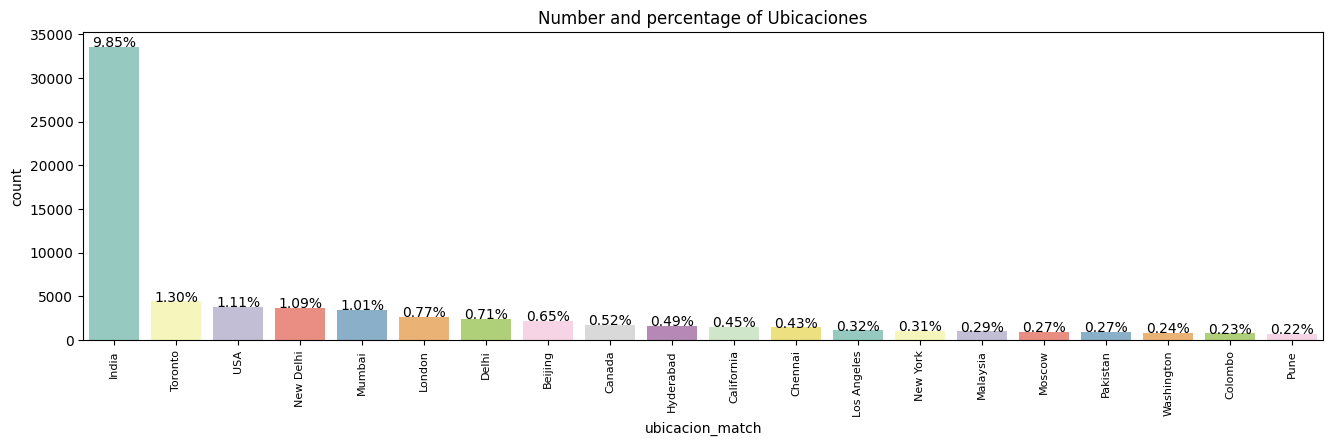

In [ ]:
plot_count("ubicacion_match", "Ubicaciones",df,4)

# 5. Procesado del lenguaje natural

## Análisis de frecuencia de palabras

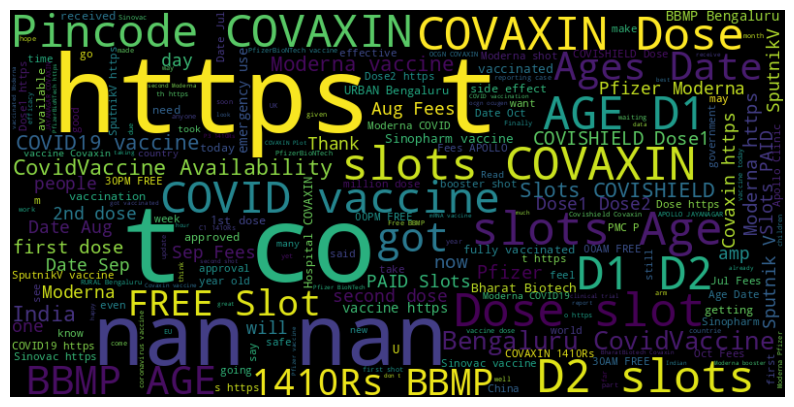

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

textos = df['text'].astype(str)

# Concatenar todos los textos en un solo string
texto_completo = ' '.join(textos)

# Crear un Word Cloud para visualizar las palabras más frecuentes
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(texto_completo)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## NLP

In [ ]:
# Poner todas las letras de la columna 'text' en minúsculas
df['text'] = df['text'].str.lower().astype(str)
df['text']

0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         #coronavirus #sputnikv #astrazeneca #pfizerbio...
3         facts are immutable, senator, even when you're...
4         explain to me again why we need a vaccine @bor...
                                ...                        
340784    45+ #urban #bengaluru #covidvaccine availabili...
340785    18-44 #bbmp #bengaluru #covidvaccine availabil...
340786    18-44 #urban #bengaluru #covidvaccine availabi...
340787    they promote their vaccines leaving out the st...
340788    45+ #urban #bengaluru #covidvaccine availabili...
Name: text, Length: 340789, dtype: object

In [ ]:
# Eliminar los URL
import re
df['text'] = df['text'].apply(lambda x :re.sub(r"http\S+", "", x))
df['text']

0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         #coronavirus #sputnikv #astrazeneca #pfizerbio...
3         facts are immutable, senator, even when you're...
4         explain to me again why we need a vaccine @bor...
                                ...                        
340784    45+ #urban #bengaluru #covidvaccine availabili...
340785    18-44 #bbmp #bengaluru #covidvaccine availabil...
340786    18-44 #urban #bengaluru #covidvaccine availabi...
340787    they promote their vaccines leaving out the st...
340788    45+ #urban #bengaluru #covidvaccine availabili...
Name: text, Length: 340789, dtype: object

In [ ]:
# Definir la función para eliminar los puntos, las comas, etc. (puntuación)
import string
def eliminar_puntuacion(texto):
    return texto.translate(str.maketrans('', '', string.punctuation))

# Aplicar la función a la columna 'text'
df['text'] = df['text'].apply(eliminar_puntuacion)

In [ ]:
# Eliminar carácteres únicos y espacions dobles
df['text'] = df['text'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
df['text'] = df['text'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
df['text']

0         same folks said daikon paste could treatcytoki...
1         while the world has been on the wrong side of ...
2         coronavirus sputnikv astrazeneca pfizerbiontec...
3         facts are immutable senator even when youre no...
4         explain to me again why we needvaccine borisjo...
                                ...                        
340784    45 urban bengaluru covidvaccine availability f...
340785    1844 bbmp bengaluru covidvaccine availability ...
340786    1844 urban bengaluru covidvaccine availability...
340787    they promote their vaccines leaving out the st...
340788    45 urban bengaluru covidvaccine availability f...
Name: text, Length: 340789, dtype: object

In [ ]:
# Eliminar las palabras que no tienen ningún tipo de significado, como artículos, pronombres, etc.
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

STOPWORDS = set(stopwords.words('english'))

# Función para eliminar stopwords
def eliminar_stopwords(text):
    return " ".join([word for word in str(text).split() if word.lower() not in STOPWORDS])

# Aplicar la función a la columna 'text'
df['text'] = df['text'].apply(eliminar_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Eliminar los emoticonos

def eliminar_emojis(text):
    # Eliminar emojis utilizando expresiones regulares
    emojis = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # símbolos y pictogramas
                               u"\U0001F680-\U0001F6FF"  # transporte y símbolos de mapas
                               u"\U0001F700-\U0001F77F"  # símbolos de alquimia
                               u"\U0001F780-\U0001F7FF"  # barajas de cartas
                               u"\U0001F800-\U0001F8FF"  # símbolos de CJK
                               u"\U0001F900-\U0001F9FF"  # emotes facial
                               u"\U0001FA00-\U0001FA6F"  # símbolos de objetos
                               u"\U0001FA70-\U0001FAFF"  # símbolos de alimentos
                               u"\U00002702-\U000027B0"  # otros símbolos
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emojis.sub(r'', text)

# Aplicar la función a la columna 'text'
df['text'] = df['text'].apply(eliminar_emojis)

In [ ]:
# Palabras más comunes
from collections import Counter

cnt = Counter()
for text in df['text'].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(20)

[('nan', 112589),
 ('covaxin', 73544),
 ('vaccine', 51473),
 ('moderna', 47034),
 ('slots', 35471),
 ('dose', 30637),
 ('covid19', 29784),
 ('age', 25404),
 ('18', 21765),
 ('pfizer', 14367),
 ('bbmp', 14206),
 ('vaccines', 14014),
 ('sputnikv', 13803),
 ('2021', 13478),
 ('vaccinated', 13266),
 ('first', 12601),
 ('pincode', 12356),
 ('covidvaccine', 12312),
 ('date', 12039),
 ('covishield', 12025)]

In [ ]:
# Filtrar los tweets que contienen la palabra "nan"
tweets_filtrados = df[df['text'].str.contains("nan", case=False)]

# Mostrar los tweets filtrados
print(tweets_filtrados['text'])

71        fordnation odd verb choice doug hand observe w...
97        make vaccine companies liable pfizerbiontech p...
129       lipids used lipid nanoparticle used mrna biont...
279       tv ad 2030 “did receive cv19 vaccine 2020 2021...
291       fda gives guidance allergy pregnancy concerns ...
                                ...                        
339810    repthomasmassie covaxin safely administered gt...
339854    govcanhealth canantifraud releasing covaxin 70...
340027    director iimbangalore prof rishikeshakrishnan ...
340175    bulkpowdergirl govcanhealth jmmcgrath look cov...
340231    ind govt amp mohfwindia keeps financial deal b...
Name: text, Length: 115908, dtype: object


# 6. Análisis de sentimiento

In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob

# Realizar análisis de sentimiento para cada tweet
for tweet in df["text"]:
    analysis = TextBlob(tweet)

    # Determinar el sentimiento
    if analysis.sentiment.polarity > 0:
        sentiment = "positivo"
    elif analysis.sentiment.polarity == 0:
        sentiment = "neutral"
    else:
        sentiment = "negativo"

    print(f"Tweet: {tweet}")
    print(f"Sentimiento: {sentiment}")
    print(f"Polaridad: {analysis.sentiment.polarity}")
    print("--------------")


Streaming output truncated to the last 5000 lines.
Tweet: covaxin ocugen amp bharatbiotech needed us cant keep taking pfizer moderna amp…
Sentimiento: neutral
Polaridad: 0.0
--------------
Tweet: jameshu13398274 pmcdunnough i’m going get something i’m  husband’s entire fam…
Sentimiento: neutral
Polaridad: 0.0
--------------
Tweet: repthomasmassie tell people idea talking covaxin only…
Sentimiento: neutral
Polaridad: 0.0
--------------
Tweet: repthomasmassie people wantsafe effective choice forcovid vaccine need covaxin approved immedia…
Sentimiento: positivo
Polaridad: 0.6
--------------
Tweet: ashishkjha pl speakmedia approval covaxin use booster dose well kids 218 years as…
Sentimiento: neutral
Polaridad: 0.0
--------------
Tweet: elonmusk could tweet approval covaxin use booster dose well kids 218 years thi…
Sentimiento: neutral
Polaridad: 0.0
--------------
Tweet: repthomasmassie covaxin would choice
Sentimiento: neutral
Polaridad: 0.0
--------------
Tweet: preetbharara could tweet